<a href="https://colab.research.google.com/github/codedyasai/Python_Intermediate/blob/main/2_4_%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터(Data)
1. 통계분석은 데이터를 다루는 것이므로 데이터에서 본질적인 의미를 찾는다
2. 변수의 종류
- 질적 변수: 2진 변수라고도 부른다. 남성과 여성, 흡연 여부 등 값이 2개뿐인 변수로 명의 척도와 순서척도가 있다.
- 양적 변수: 양을 표현하는 변수, 간격 척도와 비례 척도가 있다
- 이산형 변수: 0,1,2,...와 같이 하나하나의 값을 취하는 변수로 서로 인접한 숫자 사이에 값이 존재하지 않는다
- 연속형 변수: 연속적인 값을 취할 수 있는 변수로 어떤 숫자 사이에도 반드시 숫자가 존재한다.

In [ ]:
import numpy as np
import pandas as pd

- 매직 명령어(Magic Command): IPython(Jupyter Notebook)에서 제공하는 add_function
- 접두사 %의 경우: 한 줄의 코드에서만 실행
- 접두사 %%의 경우: 여러줄, 즉 한 셀의 내용 전체를 실행

In [ ]:
%%writefile sport_test.csv
학생번호,학년,악력,윗몸일으키기,점수,순위
1, 1, 40.2, 34, 15, 4
2, 1, 34.2, 14, 7, 10
3, 1, 28.8, 27, 11, 7
4, 2, 39.0, 27, 14, 5
5, 2, 50.9, 32, 17, 2
6, 2, 36.5, 20, 9, 9
7, 3, 36.6, 31, 13, 6
8, 3, 49.2, 37, 18, 1
9, 3, 26.0, 28, 10, 8
10, 3, 47.4, 32, 16, 3

Overwriting sport_test.csv


In [ ]:
# index_col: 인덱스로 사용할 컬럼명
df = pd.read_csv('sport_test.csv', index_col='학생번호')

In [ ]:
df

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


In [ ]:
df['악력']

학생번호
1     40.2
2     34.2
3     28.8
4     39.0
5     50.9
6     36.5
7     36.6
8     49.2
9     26.0
10    47.4
Name: 악력, dtype: float64

# 데이터의 크기
- DataFrame의 크기는 shape

In [ ]:
df.shape

(10, 5)

#  기초 통계 분석
- 데이터의 특징을 파악하는 방법에는 크게 두 가지가 있다.
- 하나는 평균이나 분산 등의 수치지표에 따라 데이터를 요약하는 방법이고,
- 다른 하나는 그래프를 이용하여 시각화를 통해 데이터를 분석하는 방법이다.

In [ ]:
# 출력된 소숫점의 자릿수 제한
%precision 3
# DataFrame의 출력될 값의 소숫점이하 3자리로 제한
pd.set_option('precision', 3)

In [ ]:
# 위에꺼가 안먹을땐
# numpy를 통해 소숫점 자릿수를 제한
np.set_printoptions(precision=3)

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
# numpy 실수 출력을 설정
np.set_printoptions(formatter={'float_kind': lambda x: '{0:0.3f}'.format(x)})

In [ ]:
%%writefile scores_em.csv
student_number,english,mathematics
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76

Writing scores_em.csv


In [ ]:
df2 = pd.read_csv('scores_em.csv', index_col='student_number')
df2

,english,mathematics
student_number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [ ]:
scores = np.array(df2['english'])
scores

array([42, 69, 56, 41, 57])

In [ ]:
scores_df = pd.DataFrame({'score':scores},
                         index= pd.Index(['A', 'B', 'C', 'D', 'E']))

scores_df

,score
A,42
B,69
C,56
D,41
E,57


## 평균값(mean): 가장 일반적으로 사용되는 대푯값


In [ ]:
sum(scores)/len(scores)

53.0

In [ ]:
np.mean(scores)

53.0

In [ ]:
# DataFrame, Series객체에서 mean() 사용
scores_df.mean()

score    53.0
dtype: float64

In [ ]:
scores_df['score']

A    42
B    69
C    56
D    41
E    57
Name: score, dtype: int64

## 중앙값(median)

In [ ]:
sorted_df = np.sort(df['윗몸일으키기'])
sorted_df

array([14, 20, 27, 27, 28, 31, 32, 32, 34, 37])

In [ ]:
np.median(sorted_df)

29.5

## 최빈값(mode): 데이터에서 가장 많이 나타나는 값
- 기본적으로 질적 데이터(범주형 데이터)의 대푯값을 구할 때 사용하는 지표

In [ ]:
pd.Series([1,1,1,1,1,4,6,7,94,3,6,8,4,2]).mode()

0    1
dtype: int64

## 편차(deviation): 각 데이터가 평균으로부터 어느 정도 떨어져 있는가를 나타내는 지표

In [ ]:
mean = np.mean(scores)
mean

53.0

In [ ]:
deviation = scores - mean
deviation

array([-11.,  16.,   3., -12.,   4.])

## 분산(Variance): 편차의 제곱

In [ ]:
np.mean(deviation ** 2)

109.2

In [ ]:
np.var(scores)

109.2

In [ ]:
df2['english'].var()

136.5

- 분산에는 표본본산과 불편분산의 두 종류가 있다.
- np는 표본분산, pd는 불편분산. 국내 통계학은 보통 불편분산

## 표준편차(standard deviaiton): 분산에 제곱근을 취한 값

In [ ]:
np.sqrt(np.var(scores, ddof=0))

10.449880382090505

In [ ]:
np.std(scores, ddof=0)

10.449880382090505

### 범위(range): 데이터의 최대값과 최소값만으로 산포도를 표현하는 방법
- 분산이나 표준편차와 달리 데이터 전체를 보는 것은 아니다
- 최대값과 최소값의 차이가 크면 산포도가 크기, 차이가 작으면 산포도도 작다는 의미
-이상치가 있을 경우 대푯값으로 사용할 수 없다

In [ ]:
np.max(scores) - np.min(scores)

28

## 사분위수
- 전체 데이터의 분포를 파악할 때 사용한다.

In [ ]:
pd.Series(scores).describe()

count     5.000000
mean     53.000000
std      11.683321
min      41.000000
25%      42.000000
50%      56.000000
75%      57.000000
max      69.000000
dtype: float64

# 데이터 전처리: Feature Scaling(피처 스케일링)
- 서로 다른 변수의 값들의 범위를 일정한 수준으로 맞추는 작업

1. 표준화(StandardScaler)
  - 평균이 0 이고, 분산이 1인 가우시안 정규 분포를 가진 값으로 변환.
  - z-value라는 표현을 사용
    z = (x-mean())/std()
  

2. 정규화(Normalization)
  - 일반적으로 정규화라는 것은 서로 다른 값들을 통일하기 위해 변환
  - MinMaxScaler: 데이터의 값을 0과1 사이의 값으로 변환하는 것
    단, 음수값이 있으면 -1에서 1 사이의 값으로 변환

3. 범주형 데이터(문자) => 정형화를 하기 위헤
  - One-Hot encoding(원-핫 인코딩): 문자값을 0과 1의 값으로 변환


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
scaler = StandardScaler()
iris = load_iris()

In [ ]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

- iris가 데이터프레임이 아니니 데이터프레임화하자.
- 데이터프레임: data, index, columns


In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# iris 모든 컬럼(피처) 값이 평균 0에 아주 가까운 값으로, 분산은 1에 가까운 값으로 변환
scaler.fit(iris_df)
iris_sc = scaler.transform(iris_df)
iris_sc = pd.DataFrame(data= iris_sc, columns= iris.feature_names) # 맨처음에 부른 iris로 다시 해야댐

In [ ]:
iris_sc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
iris_sc.mean()

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

In [ ]:
iris_sc.var()

sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_mms = scaler.transform(iris_df)
iris_mms = pd.DataFrame(data=iris_mms, columns= iris.feature_names)
iris_mms.head()

In [ ]:
iris_mms.min

In [ ]:
iris_mmis.max

In [ ]:
# fit_transform()
# fit / predict

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# z_value = (x - np.mean())/ np.std()

z_value = (iris['sepal_length'] - np.mean(iris['sepal_length']))/ np.std(iris['sepal_length'])
z_value

0     -0.900681
1     -1.143017
2     -1.385353
3     -1.506521
4     -1.021849
         ...   
145    1.038005
146    0.553333
147    0.795669
148    0.432165
149    0.068662
Name: sepal_length, Length: 150, dtype: float64

## 데이터 인코딩
- 레이블 인코딩(Label Encoding)
- 원-핫 인코딩(One-Hot Encoding)


In [ ]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '에어프라이기', '에어프라이기']

lbe.fit(items)
item_lbe = lbe.transform(items)
print(item_lbe)

[0 1 4 5 2 2 3 3]


- OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형으로 변환되어야한다.
- 입력값으로 2차원 데이터가 필요하다

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
item_lbe = item_lbe.reshape(-1, 1)
ohe.fit(item_lbe)
item_ohe = ohe.transform(item_lbe)
print(item_ohe.toarray())

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [ ]:
# 실습
# batter_stats_2017.csv, picher_stats_2017.csv

In [ ]:
picher = pd.read_csv('picher_stats_2017.csv')
batter = pd.read_csv('batter_stats_2017.csv')

In [ ]:
picher.columns


Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [ ]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [ ]:
picher.shape

(152, 22)

In [ ]:
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [ ]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<Axes: >

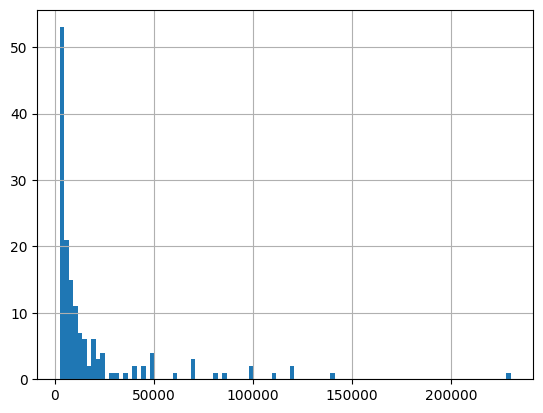

In [ ]:
picher['연봉(2018)'].hist(bins= 100)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


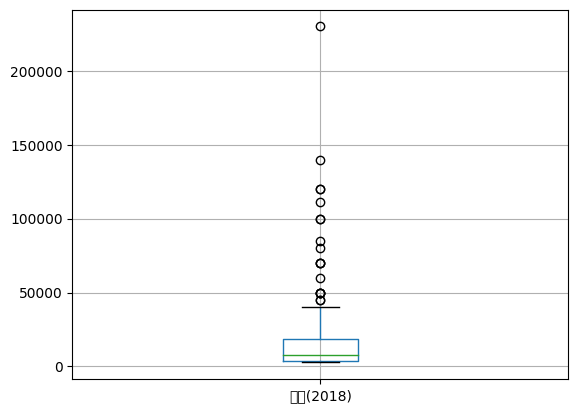

In [ ]:
picher.boxplot(column= '연봉(2018)')

In [ ]:
# 피처 스케일링을 수행
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']

In [ ]:
# 피처 각각에 대한 scaling을 수행하기 위해 함수 정의
def standard_scaling(df,scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x - series_mean)/ series_std)
    return df

In [ ]:
picher_df = standard_scaling(picher, scale_columns)
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,3.912893,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,3.266495,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,6.821679,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,2.620098,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,2.975617,2.734705


In [ ]:
# 팀명 피처를 one-hot encoding
team_encoding = pd.get_dummies(picher_df['팀명'])
team_encoding

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
147,0,0,0,0,0,0,0,0,1
148,1,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,1,0,0
150,0,0,0,0,0,0,0,1,0


In [ ]:
picher_df = picher_df.drop('팀명', axis=1)

In [ ]:
picher_df = picher_df.join(team_encoding)

In [ ]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0
